In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse

In [53]:
#Latex typography
plt.rc('font', family='serif', size=10)

In [54]:
## Mesh parameters
N = 256
w0 = 1 #Beam waist [nm]
m= 0 #Topological Charge
xmax = 3*w0
## Graphing Parameters
x =xmax*(2/N)*np.linspace(-N/2, N/2, 100)
y = x
X, Y = np.meshgrid(x, y)
## Electric Field
phi = np.arctan2(Y, X)
R = np.sqrt(X ** 2 + Y ** 2)
Field = ((R/w0)**np.abs(m))*np.exp(-(R / w0) ** 2) *np.exp(1j*m*phi) #Gaussian beam
E=Field/np.max(Field)
#Field components
Fieldx = ((X/w0)**np.abs(m)) * np.exp(-(X / w0) ** 2) * np.exp(1j*m*phi)
Fieldy = ((Y/w0)**np.abs(m)) *  np.exp(-(Y / w0) ** 2) * np.exp(1j*m*phi)
#Normalization
Ex=Fieldx/np.max(Fieldx)
Ey=Fieldx/np.max(Fieldx)

## Polarization state
V = np.array([0, 1]) #Vvertical polarization

#Input field Ein
Exin = V[0] * Ex
Eyin = V[1] * Ey

In [55]:
## Experimental calculation of Stokes parameters
So=8.1/8.1 #S0
Q=-0.7/8.1 #S1
U=0.43/8.1 #S2
V=-7.7/8.1 #S3
L=np.sqrt((Q)**2+(U)**2)

#Polarization Ellipse Parameters
A=np.sqrt((1/2)*(So+L))
B=np.sqrt((1/2)*(So-L))
rot=(1/2)*np.arctan(U/Q) #angle with respect to horizontal
print(rot)

-0.2754287672658582


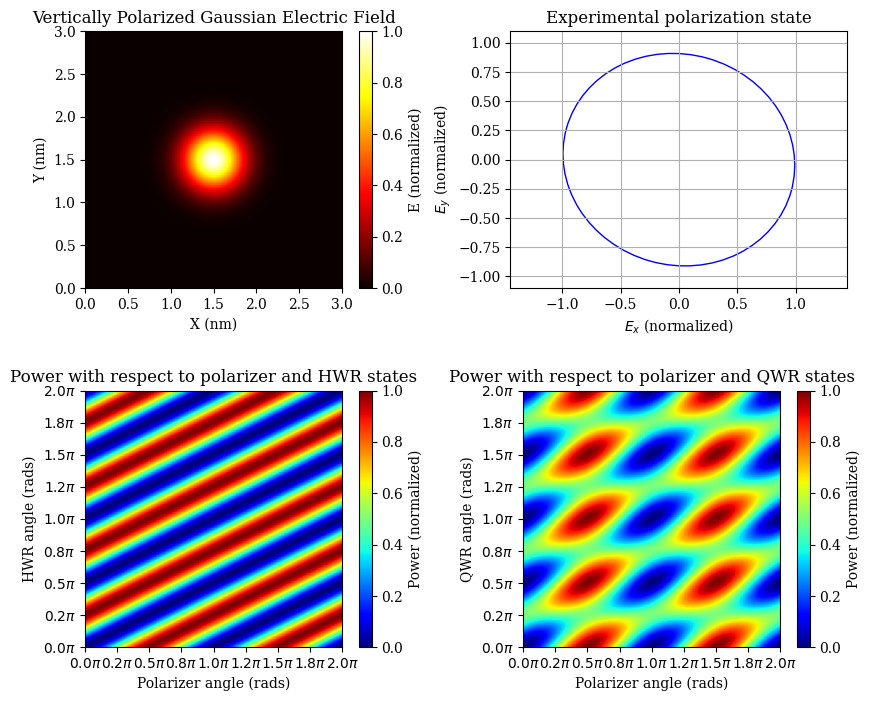

In [56]:
#################### Graphing ####################2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Graphing Electric Field
axs[0, 0].imshow(np.abs(E)**2, cmap='hot', extent=[0, xmax, 0, xmax])
axs[0, 0].set_title('Vertically Polarized Gaussian Electric Field')
axs[0, 0].set_xlabel('X (nm)')
axs[0, 0].set_ylabel('Y (nm)')

# Graphing experimental ellipse
ellipse = Ellipse(xy=(0, 0), width=(A/A)*2, height=(B/A)*2, angle=np.degrees(rot),
                  edgecolor='Blue', facecolor='none')
axs[0, 1].add_patch(ellipse)
axs[0, 1].axis('equal')
axs[0, 1].grid(True)
axs[0, 1].set_title('Experimental polarization state')
axs[0, 1].set_xlabel('$E_x$ (normalized)')
axs[0, 1].set_ylabel('$E_y$ (normalized)')
axs[0, 1].set_ylim(-1.1, 1.10)
axs[0, 1].set_xlim(-1.1, 1.10)

# Axes format
ticks = np.linspace(0, 2 * np.pi, 9)  
labels = [r'${:.1f}\pi$'.format(i/np.pi) for i in ticks]  


# QWR
axs[1, 1].imshow(I1.T, cmap='jet', origin='lower', extent=[0, 2 * np.pi, 0, 2 * np.pi])
axs[1, 1].set_title('Power with respect to polarizer and QWR states')
axs[1, 1].set_xlabel('Polarizer angle (rads)')
axs[1, 1].set_ylabel('QWR angle (rads)')
axs[1, 1].set_xticks(ticks)
axs[1, 1].set_yticks(ticks)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_yticklabels(labels)


# HWR
axs[1, 0].imshow(I2.T, cmap='jet', origin='lower', extent=[0, 2 * np.pi, 0, 2 * np.pi])
axs[1, 0].set_title('Power with respect to polarizer and HWR states')
axs[1, 0].set_xlabel('Polarizer angle (rads)')
axs[1, 0].set_ylabel('HWR angle (rads)')
axs[1, 0].set_xticks(ticks)
axs[1, 0].set_yticks(ticks)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_yticklabels(labels)

# Colorbars
cbar = axs[0, 0].figure.colorbar(axs[0, 0].images[0], ax=axs[0, 0])
cbar.set_label('E (normalized)')

cbar = axs[1, 1].figure.colorbar(axs[1, 1].images[0], ax=axs[1, 1])
cbar.set_label('Power (normalized)')

cbar = axs[1, 0].figure.colorbar(axs[1, 0].images[0], ax=axs[1, 0])
cbar.set_label('Power (normalized)')

fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()
